# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [2]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'feature_names', 'target', 'DESCR'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [8]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [9]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
print(boston.target.shape)

(506,)


In [11]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

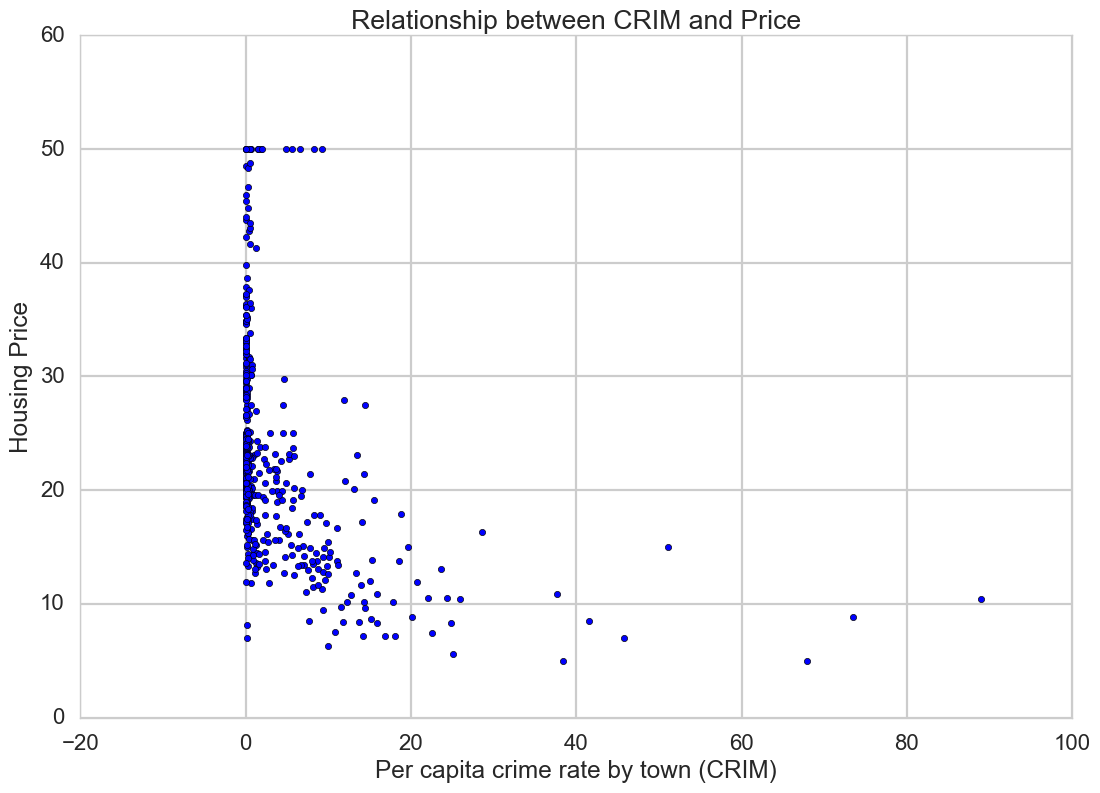

In [13]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

# Relationship between crime rate and housing price
**Exercise: What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?**

At first glance, there appears to generally be a negative correlation between crime rate and price, i.e., as crime rate increases price decreases.  However it also appears that a large portion of the dataset has a crime rate close to zero, and since CRIM has a standard deviation of 8.6, and a mean of 3.5, any value above 20 is already 2 standard deviations from the mean and probably should not be considered too strongly when predicting a correlation.  Also worth noting is that at the highest price range, there is a greater spread of crime rate, with a range up to about 10 or 11.  In this case, the scatter plot at linear scale is probably not sufficient for inference since most of the data is in a very small range of crime rate.

**Exercise: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.**

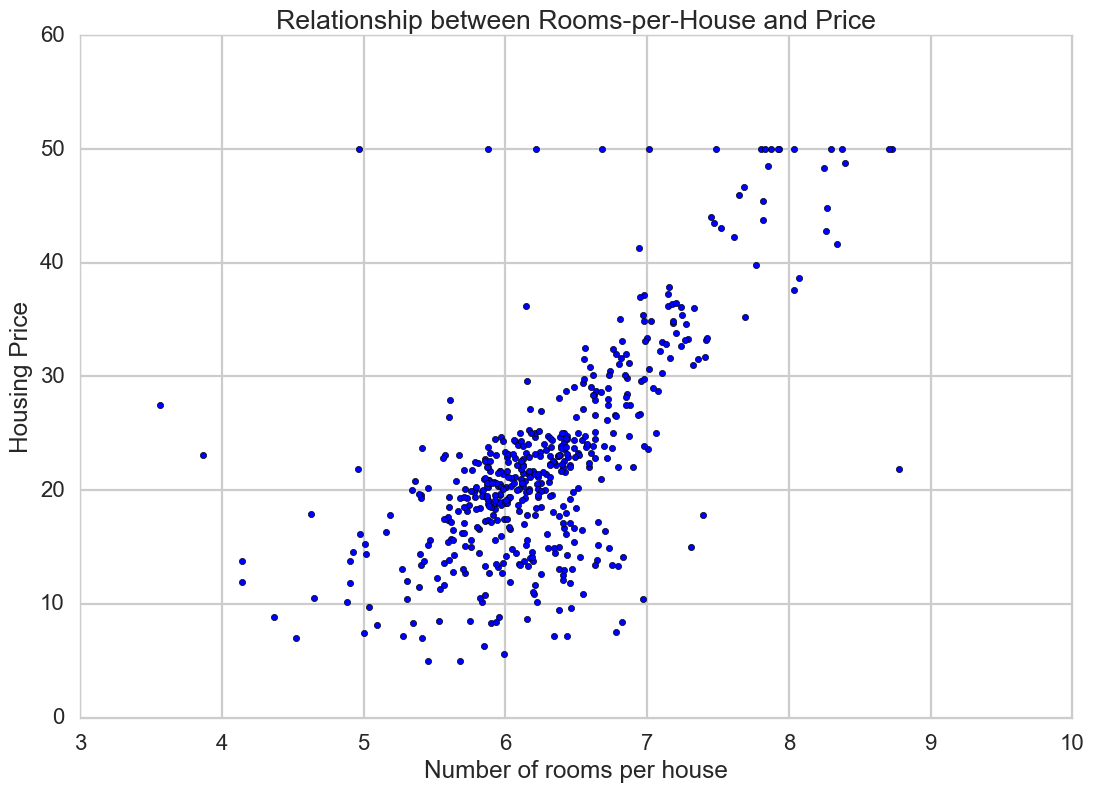

In [14]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Number of rooms per house")
plt.ylabel("Housing Price")
plt.title("Relationship between Rooms-per-House and Price")

# Relationship between number of rooms and housing price
There appears to be a fairly strong positive correlation between number of rooms and housing price, with some outliers that could be explained by other factors (e.g., those houses with a small number of rooms but a relatively high price may be located in more expensive neighborhoods.)  This relationship makes sense because it can be expected that a house with more rooms is larger and therefore commands a higher price than houses where other variables remain consistent.

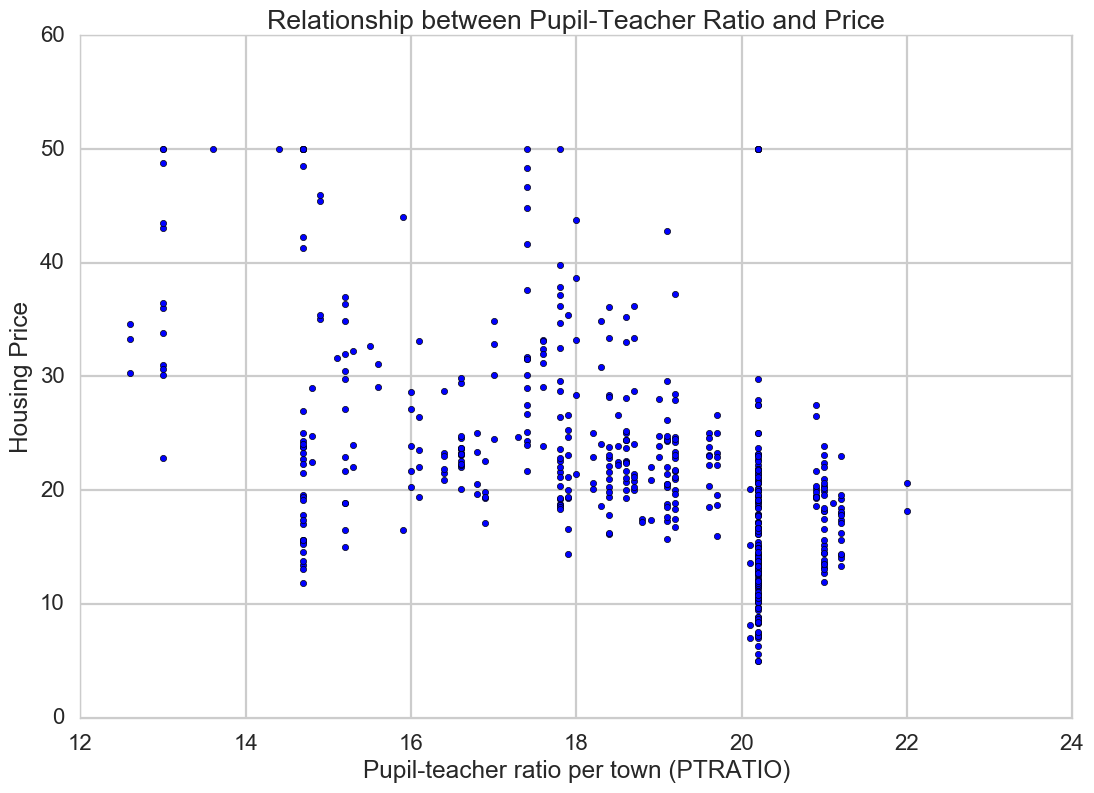

In [15]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio per town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between Pupil-Teacher Ratio and Price")

# Relationship between Pupil-Teacher Ratio and Price
There appears to be a slight negative correlation between pupil-teacher ratio and housing price.  This could be because residents of wealthier neighborhoods either send their children to private schoold with more resources or the local public schools have better resources due to higher local property tax value, and therefore are able to hire more teachers.  

**Exercise: What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.**

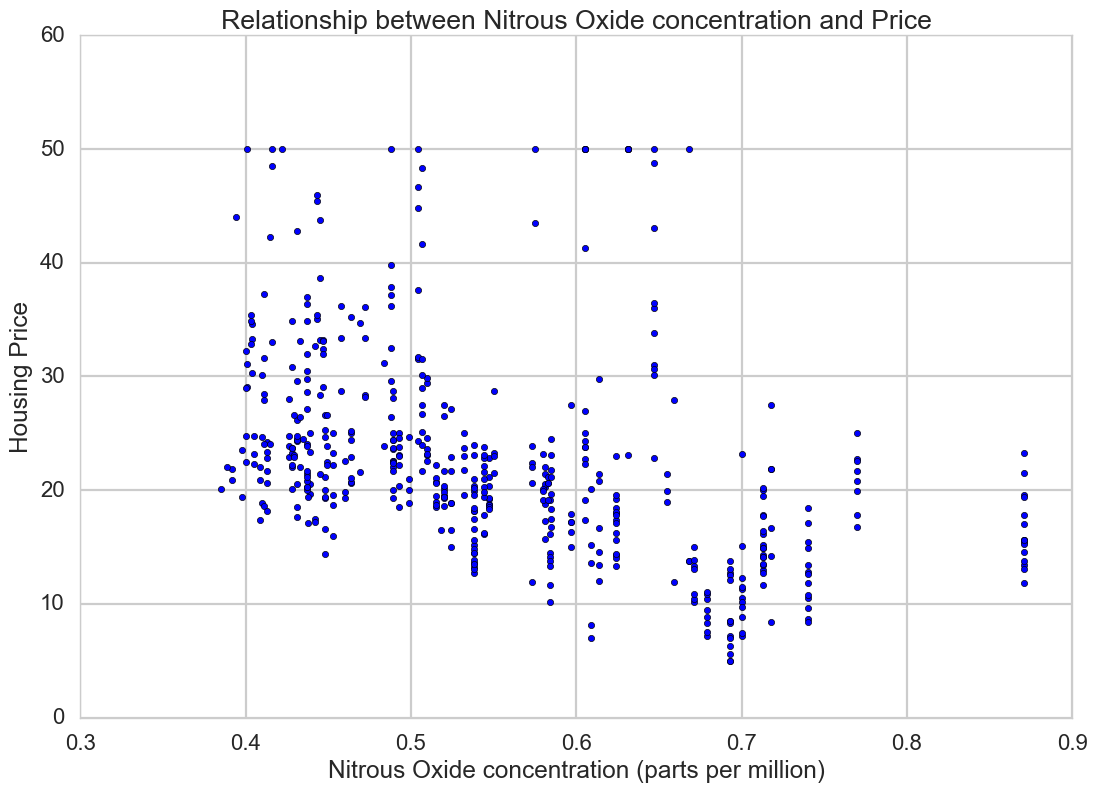

In [16]:
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("Nitrous Oxide concentration (parts per million)")
plt.ylabel("Housing Price")
plt.title("Relationship between Nitrous Oxide concentration and Price")

# Relationship between Nitrous Oxide Concentration and Price
There is a negative coorelation between nitrous oxide concentration and price.  This could be because older houses with old infrastructure or houses in disrepair (e.g., leaded paint that has not been fully sealed behind new layers of paint) likely tend to be less expensive and may contain higher concentrations of nitrous oxide and other harmful compounds.

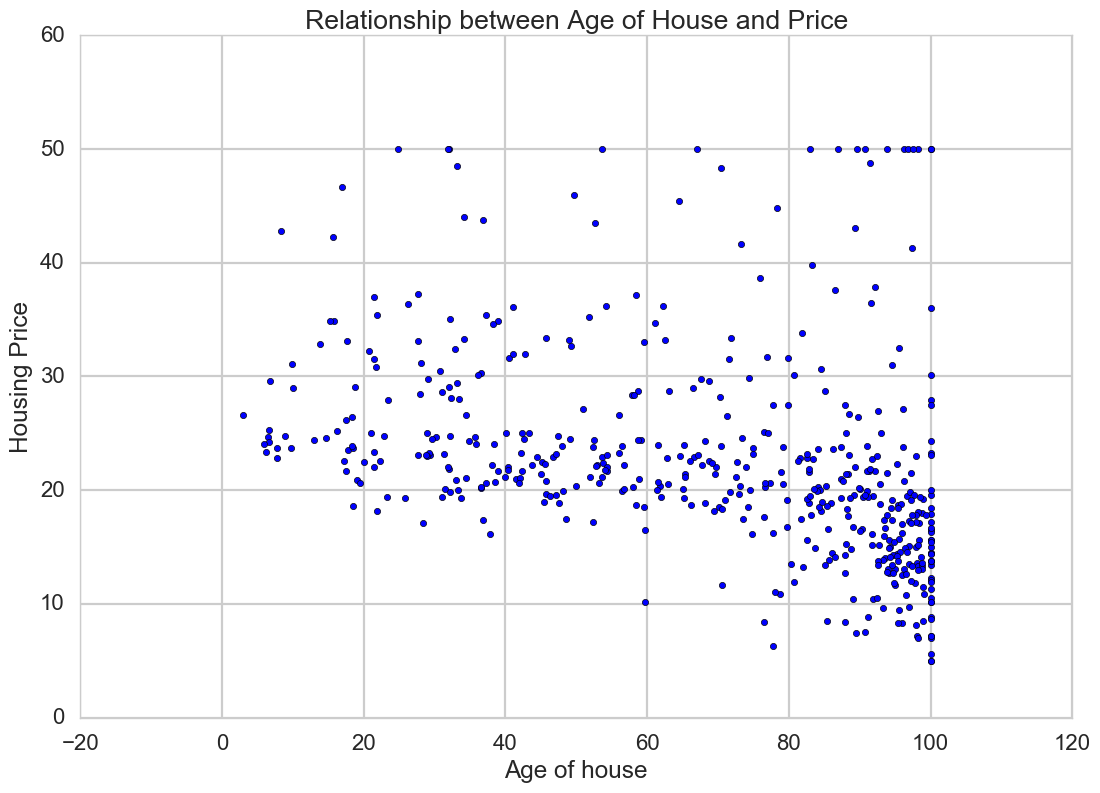

In [17]:
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Age of house")
plt.ylabel("Housing Price")
plt.title("Relationship between Age of House and Price")

# Relationship between Age of House and Price
There is a negative correlation between age of house and price, although the correlation is not necessarily linear; it looks like the correlation becomes much stronger as age of house increases, especially as age exceeds 70-80 years. This could be because older houses are more likely to fall in disrepair and lose value.  It is also worth noting that 100 is the upper limit of age, although some houses are likely older (i.e., there is likely some error simply due to the reporting for data collection).

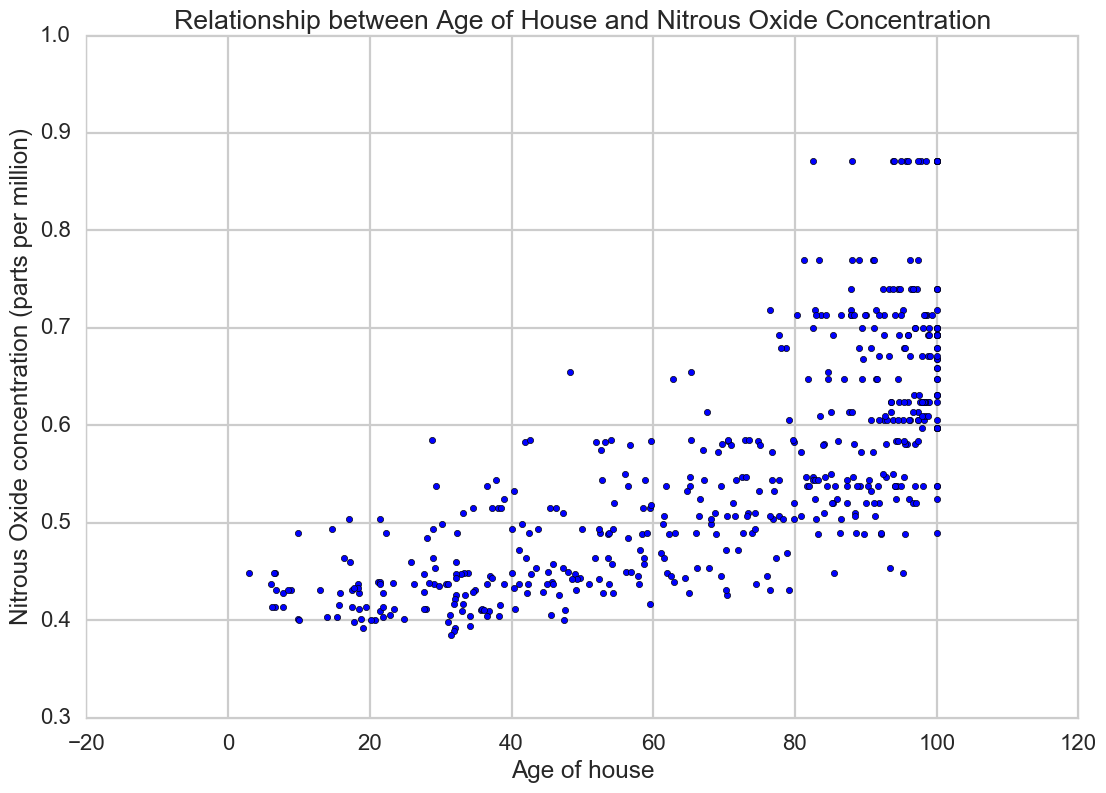

In [18]:
plt.scatter(bos.AGE, bos.NOX)
plt.xlabel("Age of house")
plt.ylabel("Nitrous Oxide concentration (parts per million)")
plt.title("Relationship between Age of House and Nitrous Oxide Concentration")

# Relationship between Age of House and Nitrous Oxide Concentration
Although this analysis was not explicitly requested for this part of the exercise, I thought it would be interesting to look at the relationship between Age of House and Nitrous Oxide Concentration, both of which were correlated with housing price, and which I suspected might be related as a result.  Indeed, I find that there appears to be an even stronger correlation between Age of house and Nitrous Oxide concentration than between either of these variables and housing price.  This supports my argument that Nitrous Oxide content might be higher in less expensive houses because less expensive houses tend to be older and therefore more likely to contain harmful compounds.

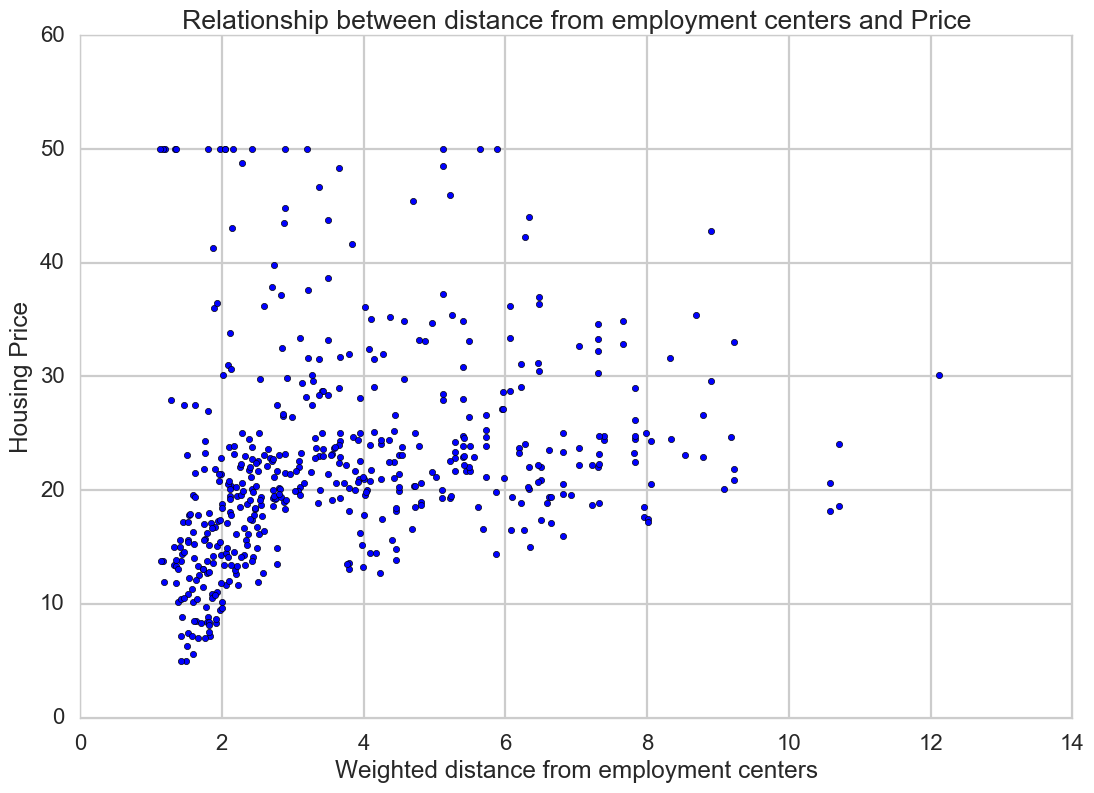

In [19]:
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted distance from employment centers")
plt.ylabel("Housing Price")
plt.title("Relationship between distance from employment centers and Price")

# Relationship between Distance from Employment Centers and Housing Price.
This plot suggests that there is a positive correlation between distance from employment centers and housing price, although the correlation may not be completely linear - it appears that the correlation is quite strong between 0.5 and 3 miles from employment centers, but becomes weaker as the distance increases.  I would hypothesize that this might be because employment centers are located in less desirable areas to live, and therefore the immediately surrounding area would contain lower value housing, however, outside of the areas within 2 miles of employment centers there is less of a relationship.  

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

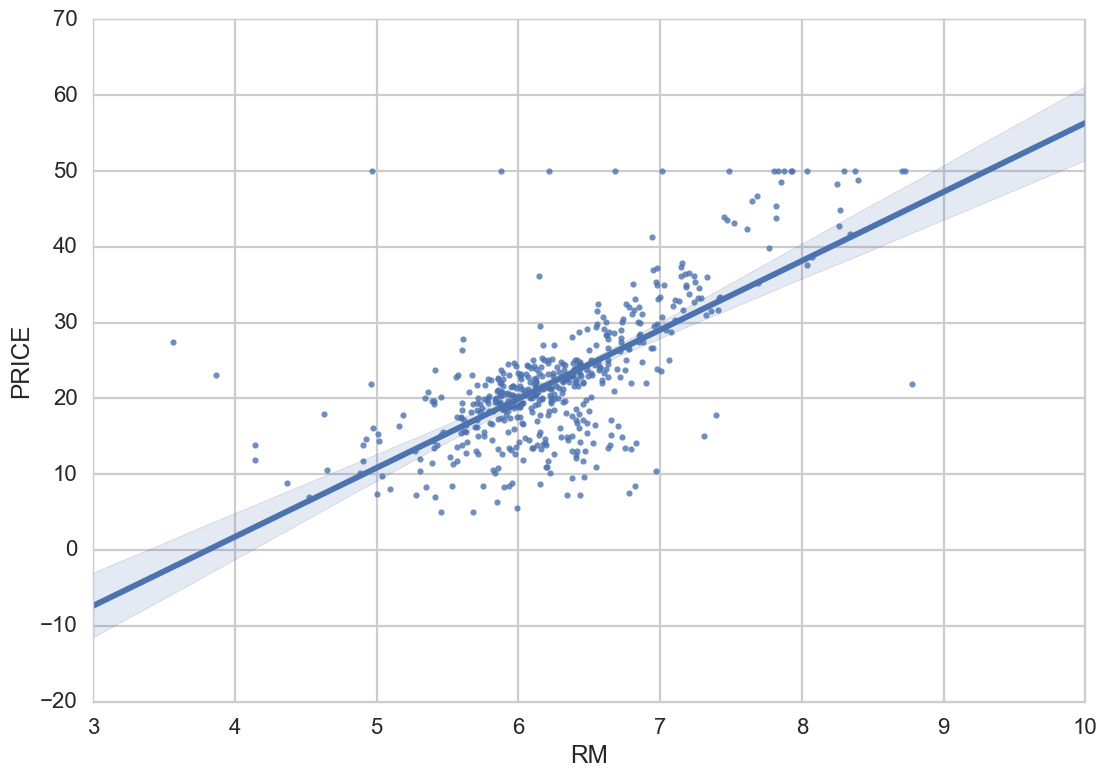

In [20]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


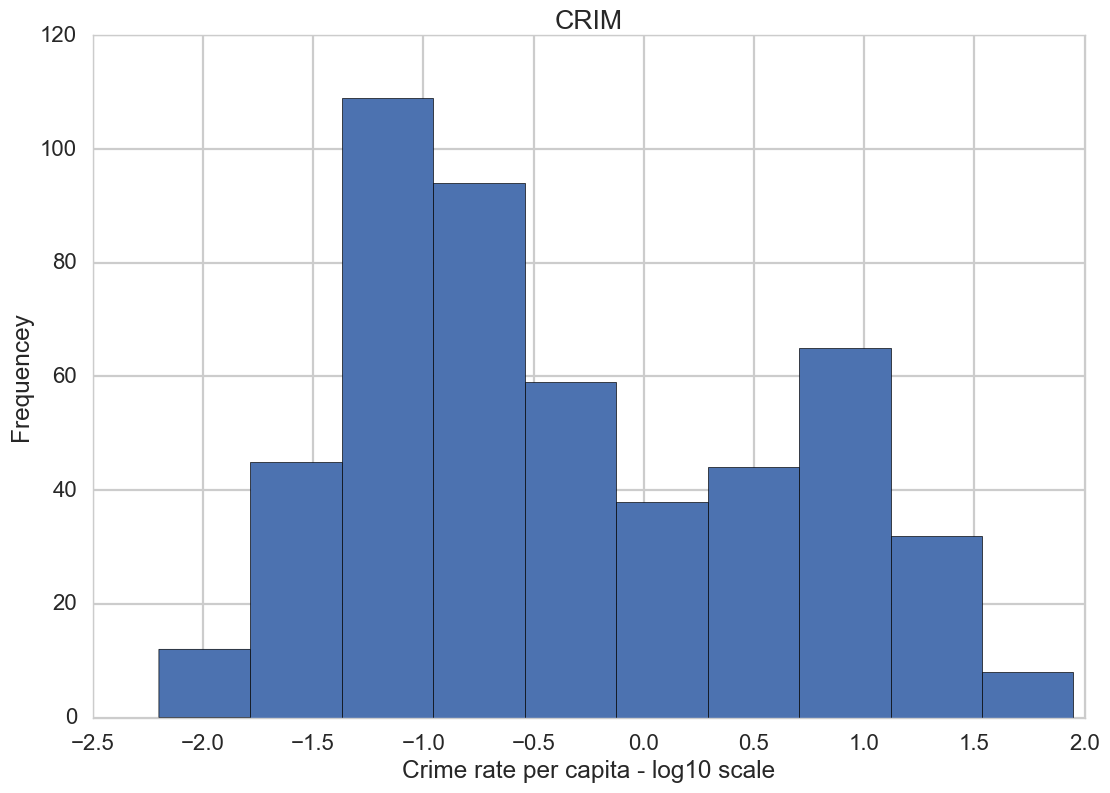

In [21]:
#Note: Changed the plotted function to np.log10 for easier analysis.
plt.hist(np.log10(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita - log10 scale")
plt.ylabel("Frequencey")
plt.show()

# Part 2 Checkup Exercise Set II

**Exercise: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?**

Taking the log allows us to look at the data at a much higher resolution of detail.  In this case, almost all of the data points for crime rate are between 0 and 10, but some are quite a bit higher, so it is impossible to parse the data visually using a histogram with the linear data.  When we take the log of the crime rate, we can see that there is actually a shapely distribution of the log of the data - in this case, the distribution is bimodal with peaks around real values 0.01 and 10.

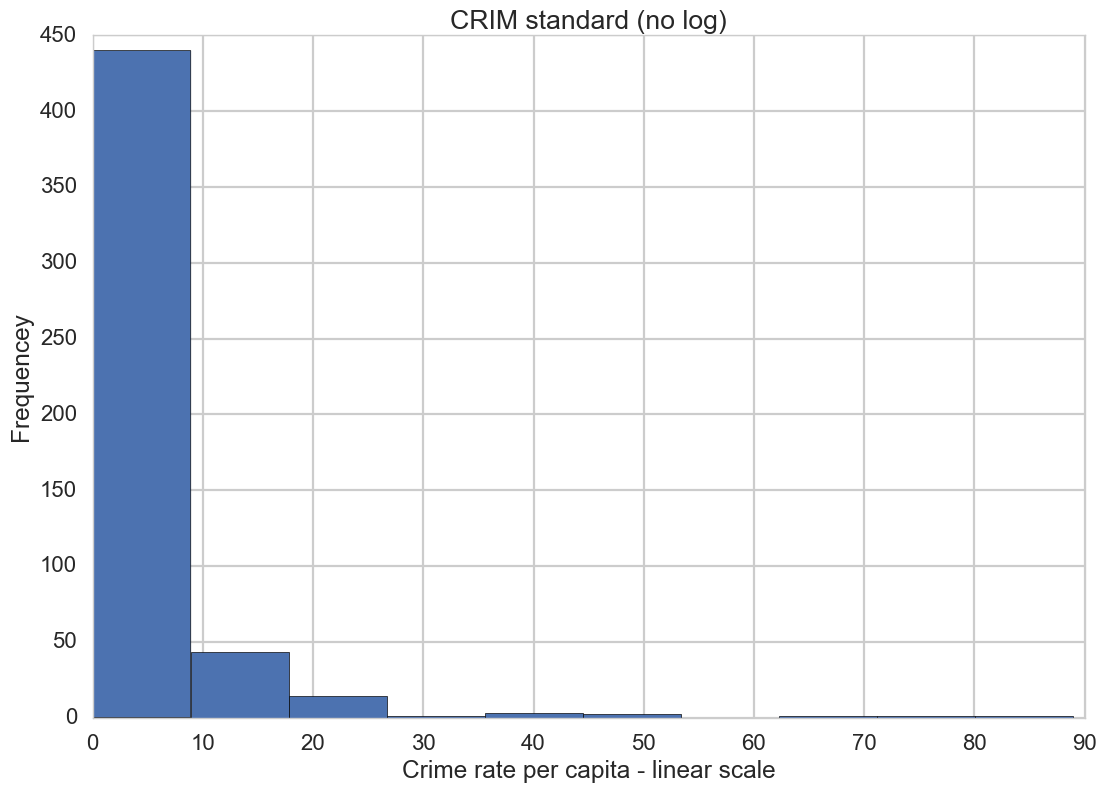

In [22]:
plt.hist((bos.CRIM))
plt.title("CRIM standard (no log)")
plt.xlabel("Crime rate per capita - linear scale")
plt.ylabel("Frequencey")
plt.show()


**Exercise: Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.**

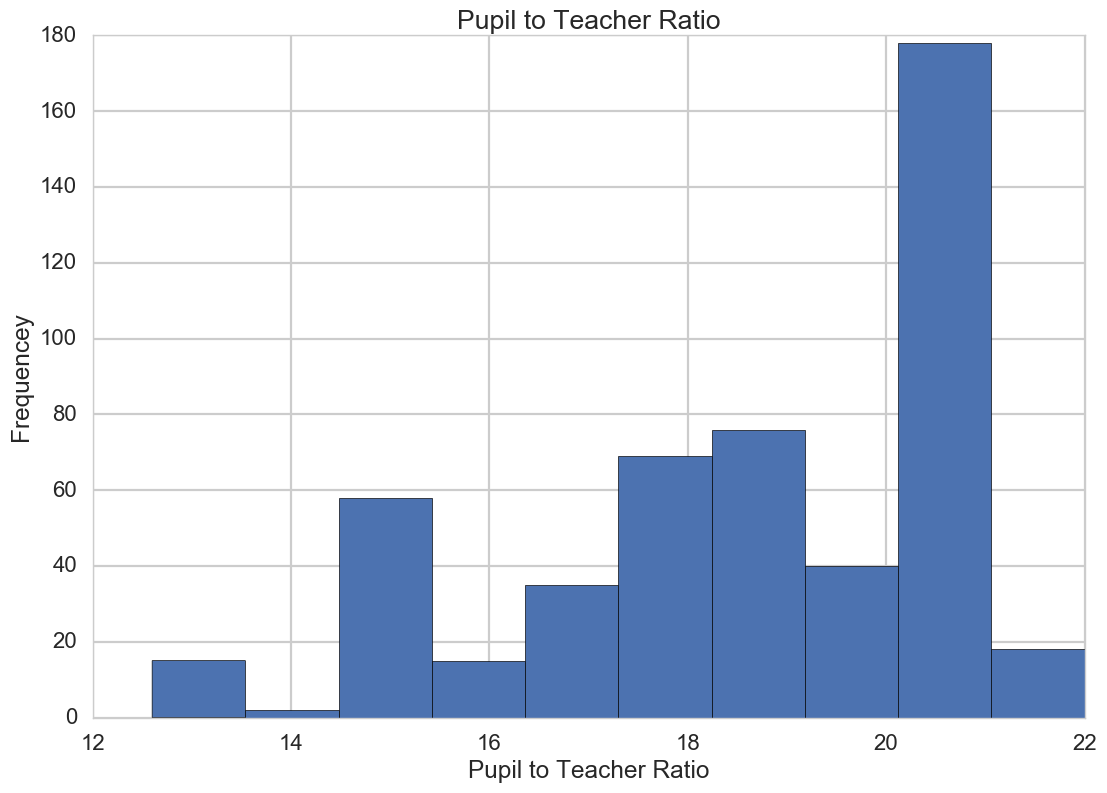

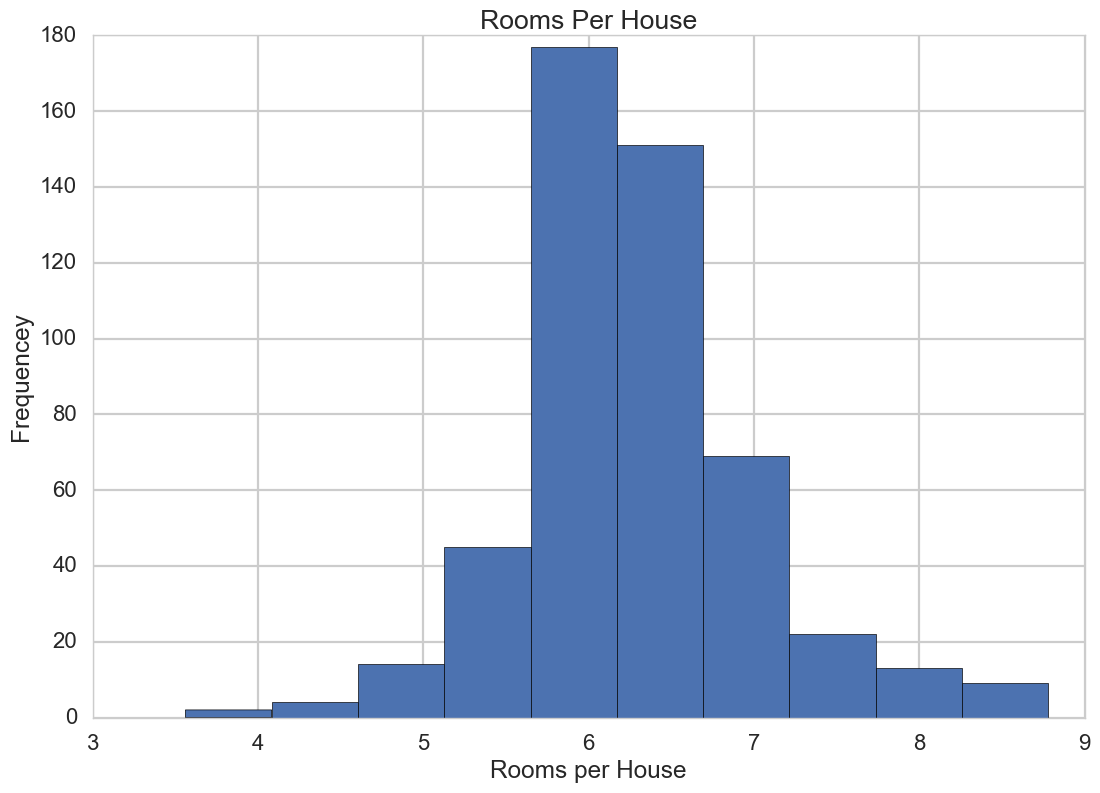

In [23]:
plt.hist((bos.PTRATIO))
plt.title("Pupil to Teacher Ratio")
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Frequencey")
plt.show()
plt.hist((bos.RM))
plt.title("Rooms Per House")
plt.xlabel("Rooms per House")
plt.ylabel("Frequencey")
plt.show()

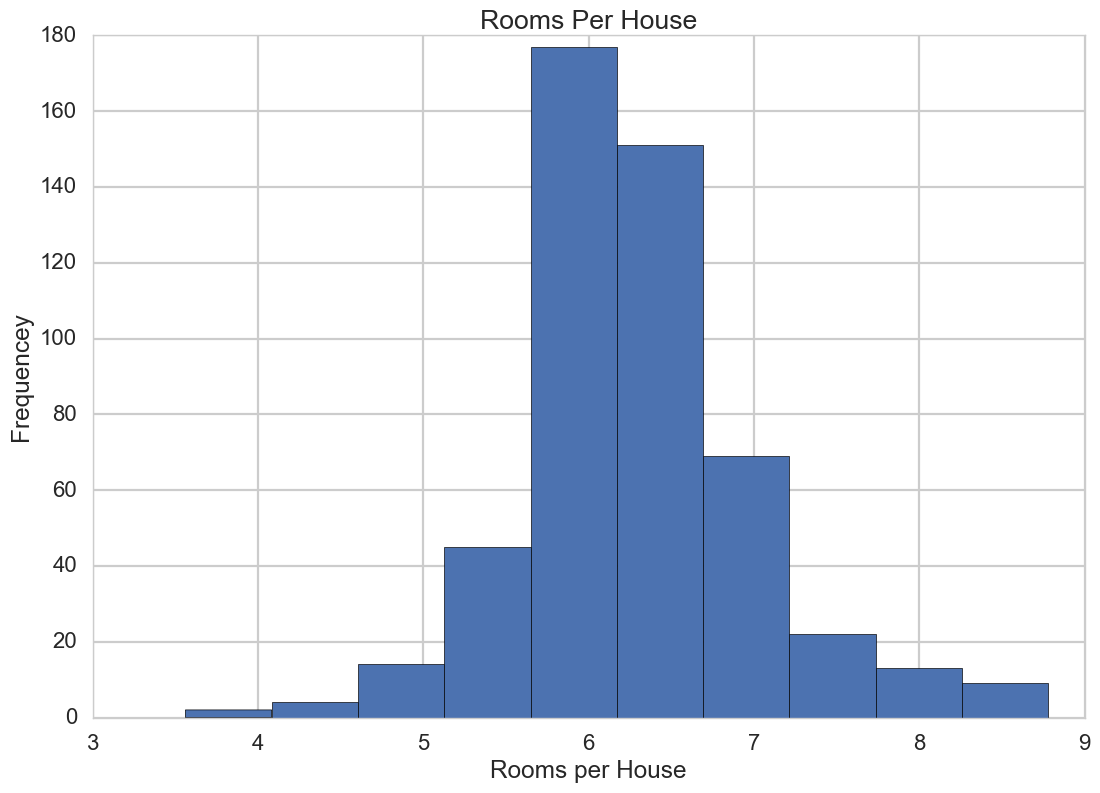

In [24]:
plt.hist((bos.RM))
plt.title("Rooms Per House")
plt.xlabel("Rooms per House")
plt.ylabel("Frequencey")
plt.show()

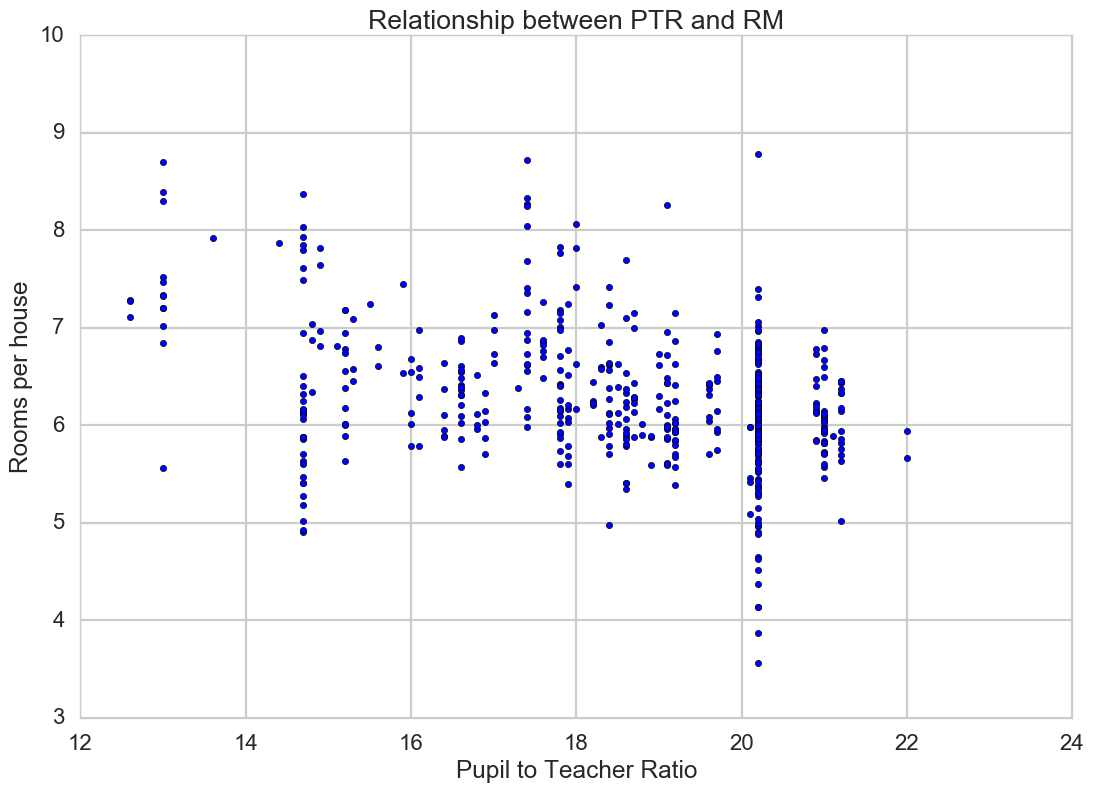

In [25]:
plt.scatter(bos.PTRATIO, bos.RM)
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Rooms per house")
plt.title("Relationship between PTR and RM")

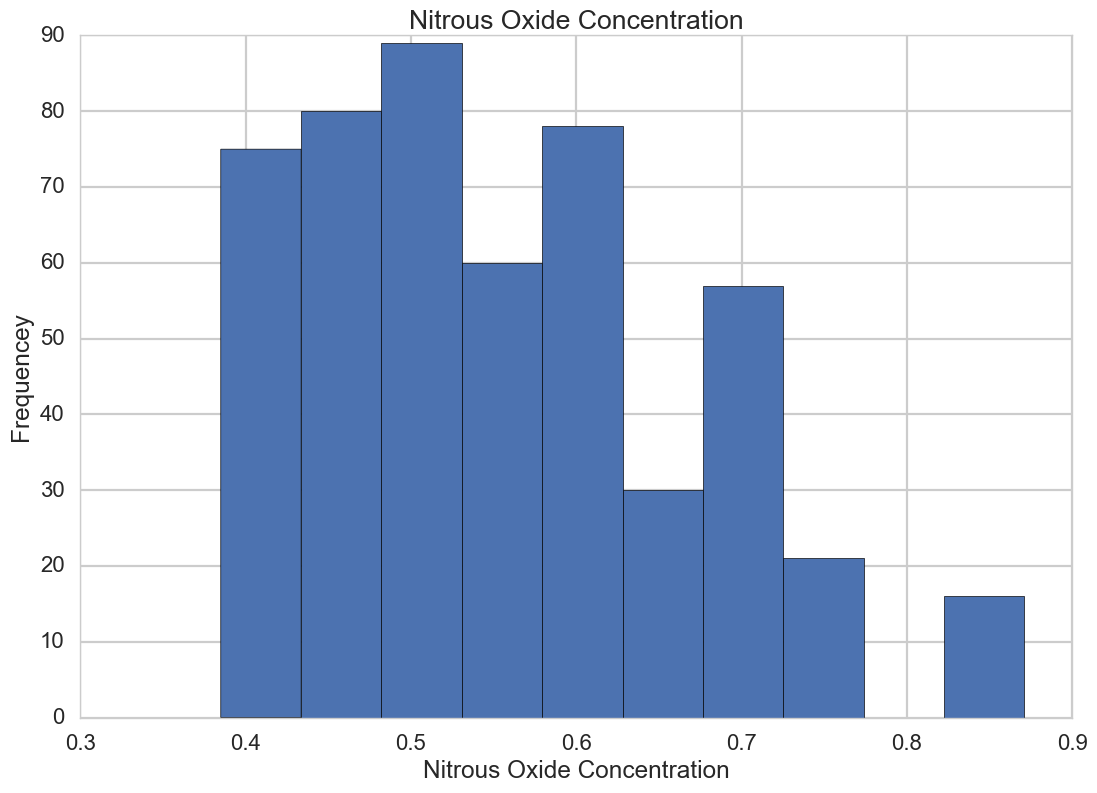

In [26]:
plt.hist((bos.NOX))
plt.title("Nitrous Oxide Concentration")
plt.xlabel("Nitrous Oxide Concentration")
plt.ylabel("Frequencey")
plt.show()

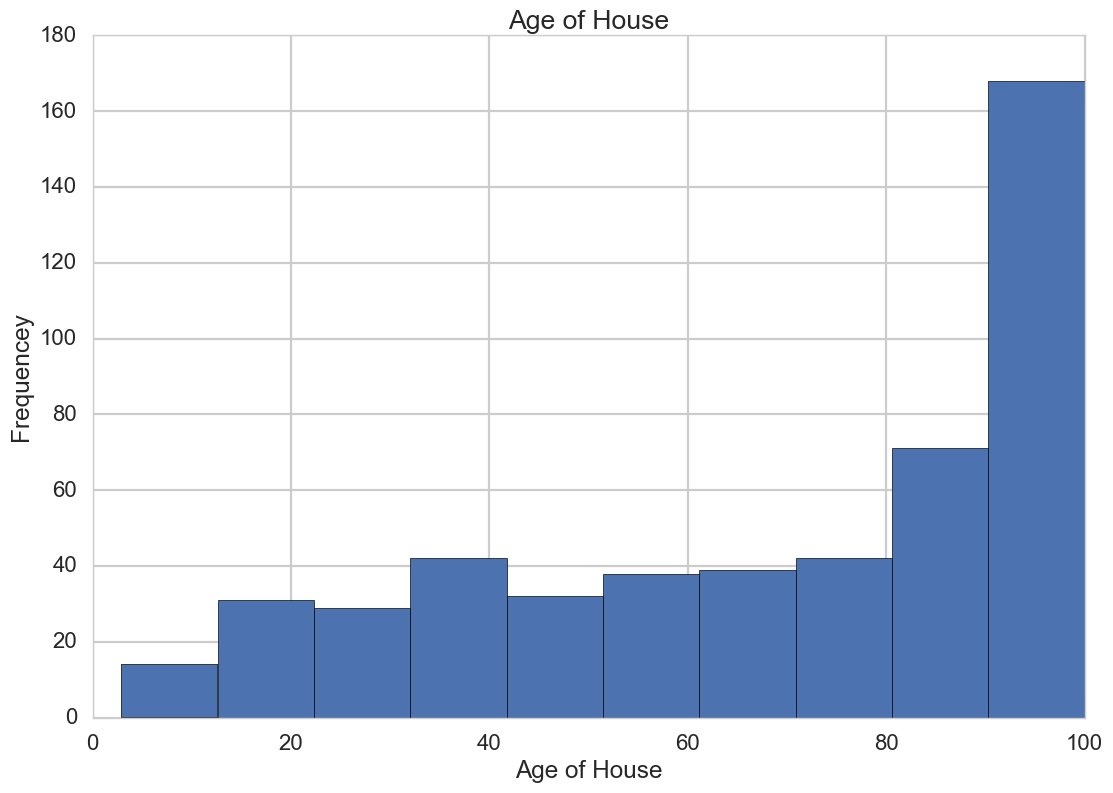

In [27]:
plt.hist((bos.AGE))
plt.title("Age of House")
plt.xlabel("Age of House")
plt.ylabel("Frequencey")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [28]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 04 Jan 2017   Prob (F-statistic):           2.49e-74
Time:                        14:19:37   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [30]:
m = ols('PRICE ~ RM + CRIM + ZN + INDUS + CHAS + NOX + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',bos).fit()
print(m.summary())
print(m.bse)

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 04 Jan 2017   Prob (F-statistic):          6.95e-135
Time:                        14:19:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

# Part 3 Checkup Exercise Set I

**Exercise: Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.**

The plot seems to generally show a strong positive correlation between predicted and actual housing price, although there are some outliers.  Some of these outliers are unrealistically low - for instance, some of the predicted values are nearly 0, and one is even below 0.  Also, it looks like the correlation is weaker where the predicted price is lower, but tends to strengthen as predicted housing price increases.  As noted above, there appears to be a ceiling effect which is likely a result of limitations in the original data reporting (i.e., the maximum input value for price may have been 50).

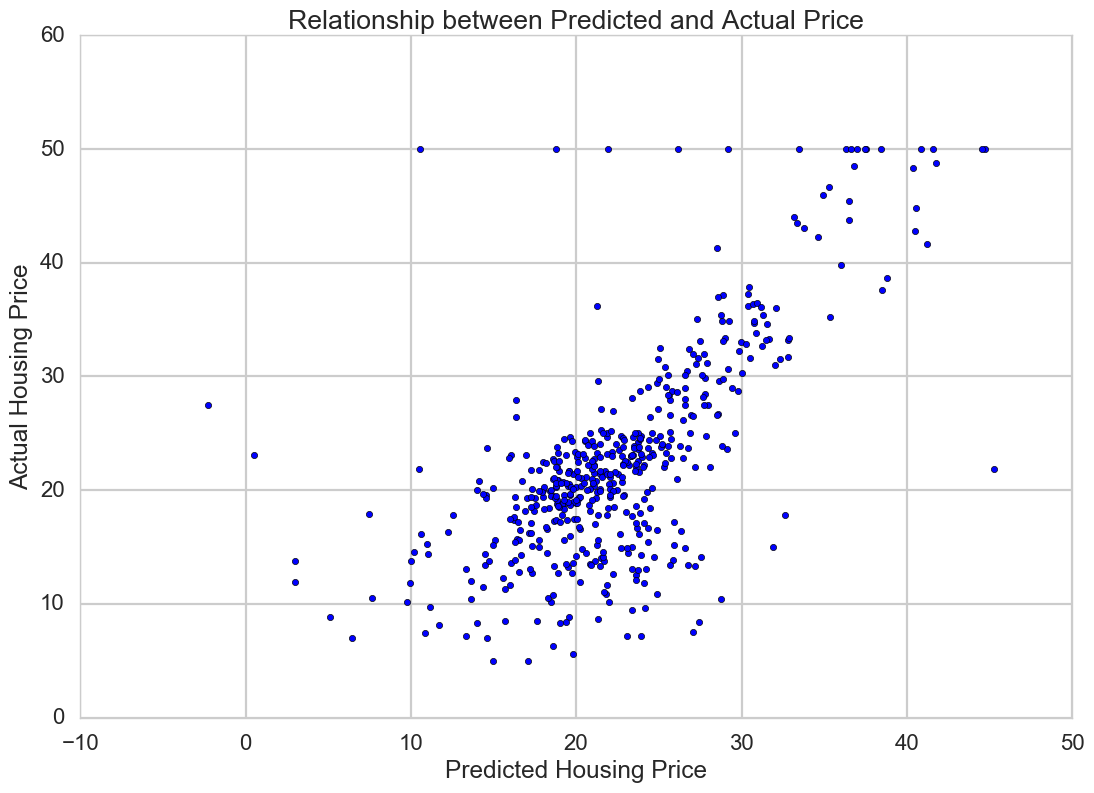

In [31]:
m = ols('PRICE ~ RM',bos).fit()
#m = ols('PRICE ~ RM + CRIM + ZN + INDUS + CHAS + NOX + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',bos).fit()
plt.scatter(m.fittedvalues,bos.PRICE)
plt.xlabel("Predicted Housing Price")
plt.ylabel("Actual Housing Price")
plt.title("Relationship between Predicted and Actual Price")

### Fitting Linear Regression using `sklearn`


In [32]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [33]:
# Look inside lm object
#lm.intercept_

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

36.4911032804
[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


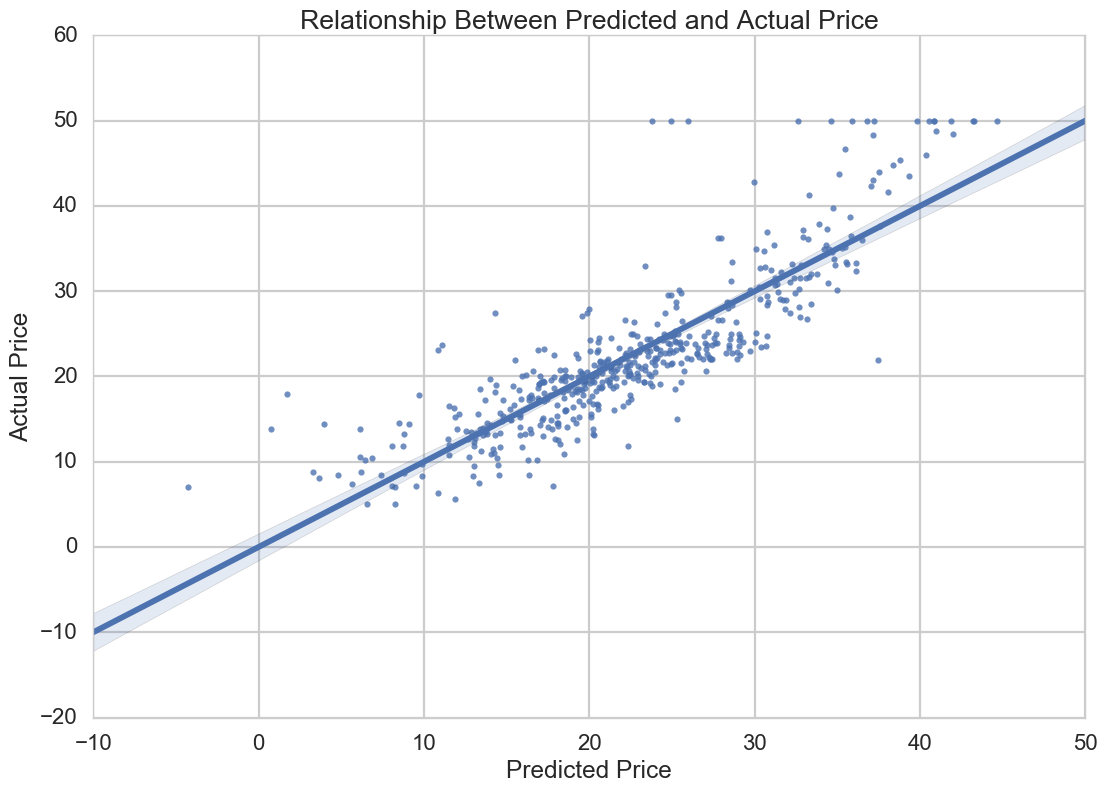

In [34]:
lm = LinearRegression()
lm.fit(X, bos.PRICE)
lm.score(X,bos.PRICE)
ax = sns.regplot(x=lm.predict(X), y="PRICE", data=bos, fit_reg = True)
ax.set(xlabel='Predicted Price', ylabel='Actual Price', title='Relationship Between Predicted and Actual Price')
print(lm.intercept_)
print(lm.coef_)

# Part 3 Checkup Exercise Set II

**Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).**

To not fit an intercept (i.e., set intercept to 0), I can simply add the argument *fit_intercept=False* to the LinearRegression method, or add a -1 in the statsmodels ols method, demonstrated below.  As for judging whether or not to use an intercept, we must consider both the context of the data as well as evidence from the results of regression analysis with or without an intercept.  In context, ommitting the intercept implies that we should assume that each variable in our regression ought to have a "true" origin of 0.  Since we are working with multiple variables, which may or may not comply with this logic, context alone is not enough to make an argument about whether or not to include an intercept.  In terms of the actual regression output, as shown below, there is a relatively minor difference between predictions with or without an intercept, although the mean error with an intercept is slightly higher.  However, while overall error may be higher with an intercept, we also see less outliers in our predictions compared to the regression without intercept.  Therefore, I would recommend including the intercept.

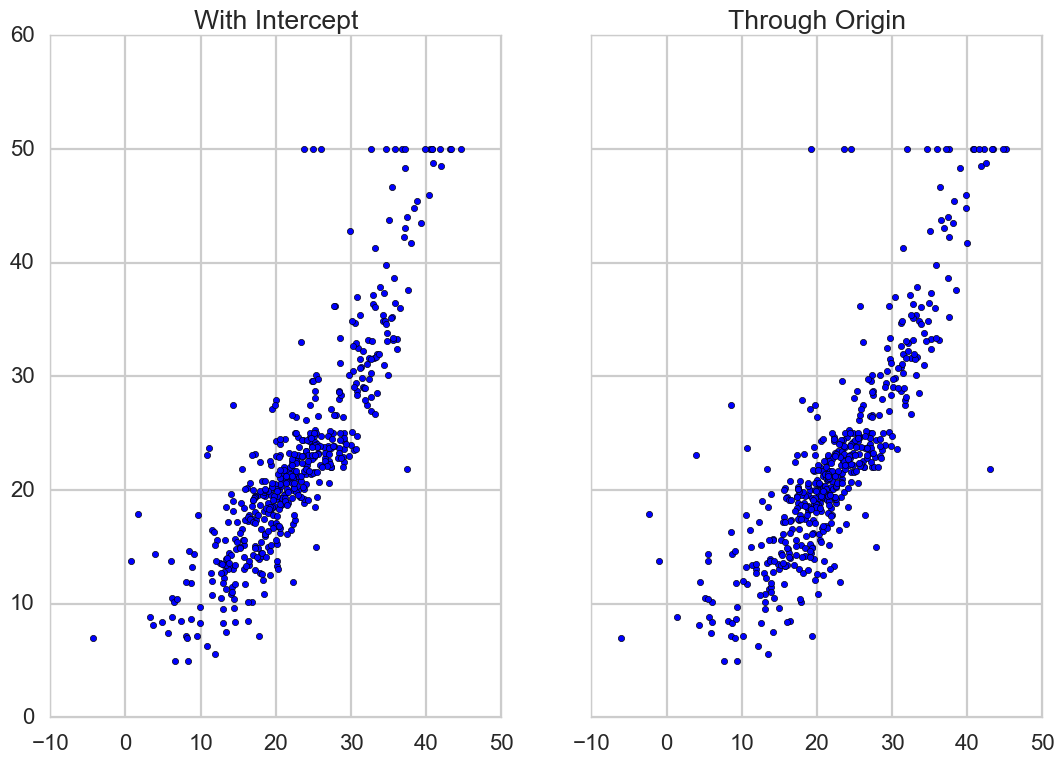

In [35]:
#Fit model with intercept
lm = LinearRegression(fit_intercept=True)
lm.fit(X, bos.PRICE)
lm.score(X,bos.PRICE)

#Fit model without intercept
lmi = LinearRegression(fit_intercept=False)
lmi.fit(X, bos.PRICE)
lmi.score(X,bos.PRICE)

#Plot models side by side
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=lm.predict(X), y="PRICE", data=bos)
ax1.set_title('With Intercept')
ax2.scatter(x=lmi.predict(X), y="PRICE", data=bos)
ax2.set_title('Through Origin')

In [36]:
#Create dataframes with the mean error for each coefficient in each condition, with or without intercept.
m_intercept = ols('PRICE ~ RM + CRIM + ZN + INDUS + CHAS + NOX + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',bos).fit()
m_0 = ols('PRICE ~ RM + CRIM + ZN + INDUS + CHAS + NOX + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT -1',bos).fit()
m_intercept_error = m_intercept.bse.to_frame()[1:]
m_0_error = m_0.bse.to_frame()
errors = pd.concat([m_intercept_error,m_0_error],axis=1)
errors.columns = ['With intercept','Through origin']
#Print mean error for each condition
print("Mean errors:")
print(errors.mean())

Mean errors:
With intercept    0.436549
Through origin    0.394541
dtype: float64


**Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.**

It is not enough to ensure that residuals are normally distributed because they must also be independent.  In the case of this dataset, this is not a concern because there is no interdependence or effect from data collection (i.e., every house that we make a prediction on is independent of the other houses).  However, in an experimental design involving subjects before or after treatment, for example, this would be of greater concern.

**Exercise: True or false. To use linear regression, Y must be normally distributed. Explain your answer.**

False. For linear regression, Y does not have to be normally distributed.  All that is required is that the residuals are normally distributed.  However, the distribution of Y should be similar to that of the training data - otherwise, there may have been some mistake made in the regression.

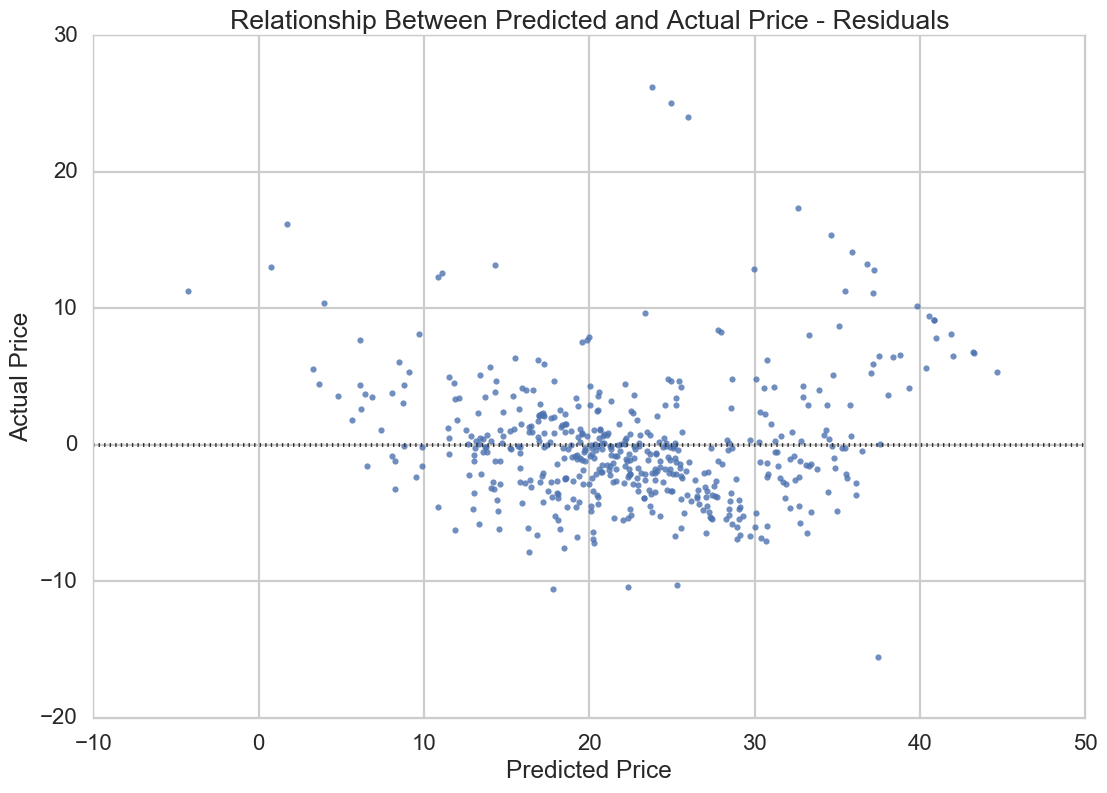

In [37]:
ax = sns.residplot(x=lm.predict(X), y="PRICE", data=bos)
ax.set(xlabel='Predicted Price', ylabel='Actual Price', title='Relationship Between Predicted and Actual Price - Residuals')

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [38]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036083


In [39]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [40]:
# The coefficients (with and without intercept)
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_,'estimatedCoefficients_0': lmi.coef_})[['features', 'estimatedCoefficients','estimatedCoefficients_0']]

,features,estimatedCoefficients,estimatedCoefficients_0
0,CRIM,-0.107171,-0.091630
1,ZN,0.046395,0.048675
2,INDUS,0.020860,-0.003779
3,CHAS,2.688561,2.856368
4,NOX,-17.795759,-2.880779
5,RM,3.804752,5.925214
6,AGE,0.000751,-0.007224
7,DIS,-1.475759,-0.967995
8,RAD,0.305655,0.170443
9,TAX,-0.012329,-0.009389


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [41]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

# Part 3 Checkup Exercise Set III

**Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?**

Histograms (analysis below):

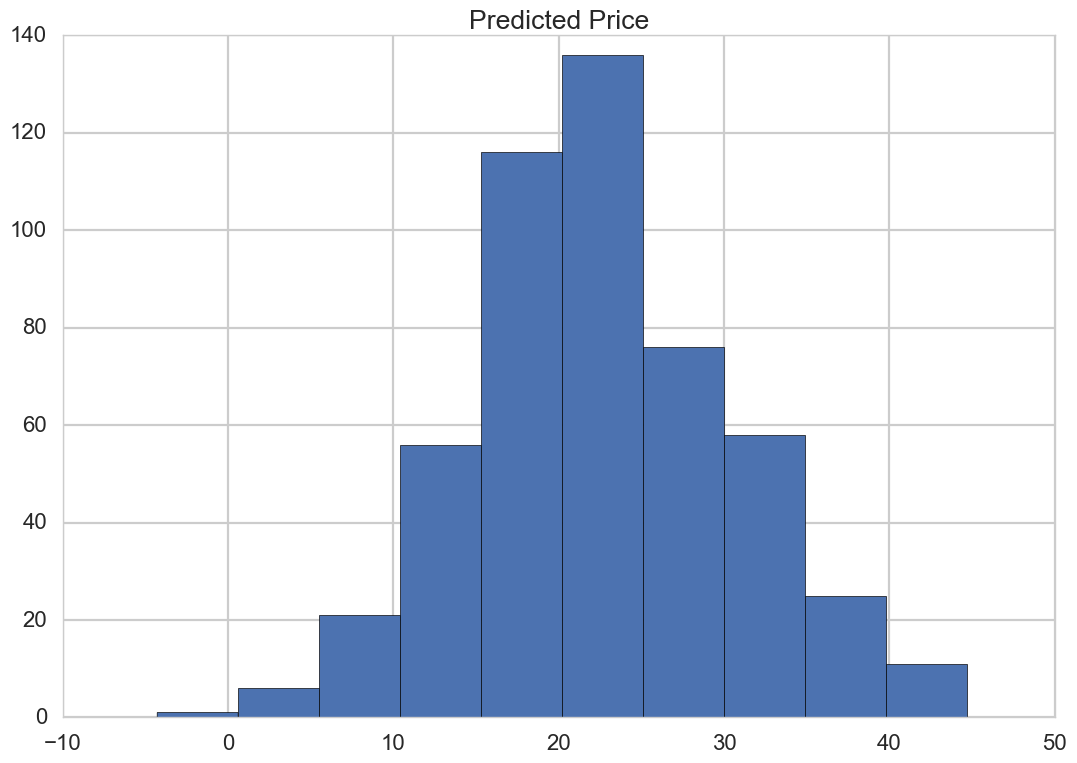

In [42]:
plt.hist(lm.predict(X))
plt.title("Predicted Price")

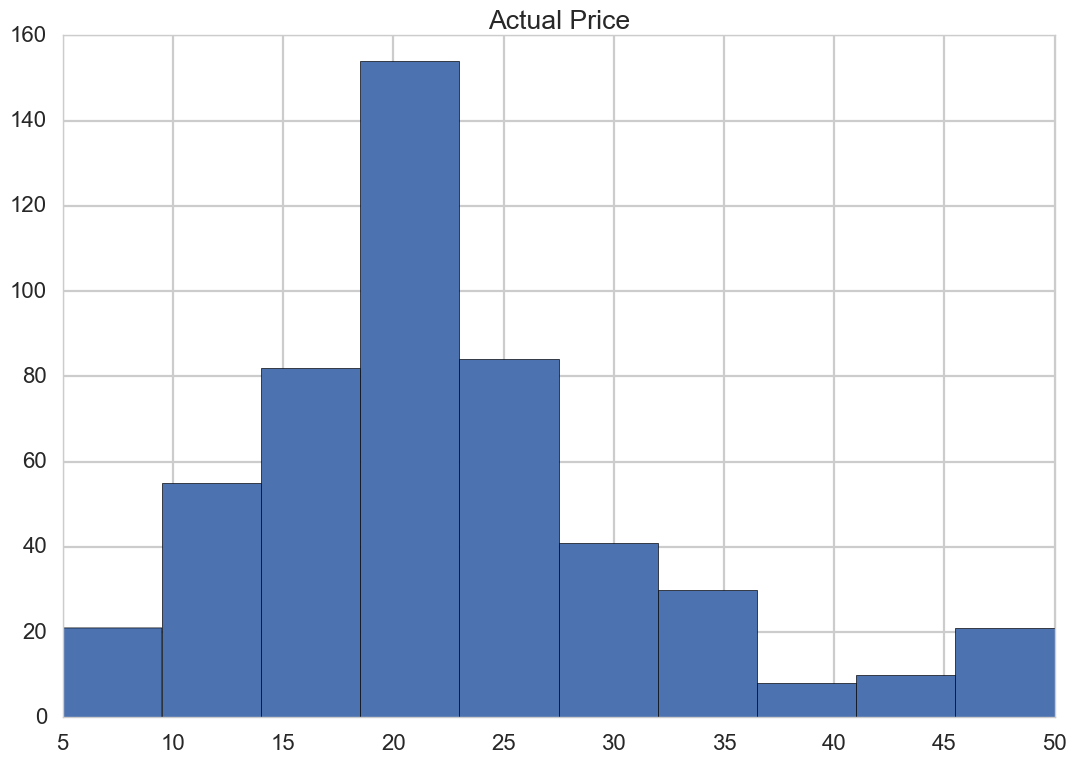

In [43]:
plt.hist(bos.PRICE)
plt.title("Actual Price")

# Analysis:
The distribution of predicted housing prices is normally distributed.  However, some outlying values may in fact be skewing this perception.  Most noteably, there is a small frequency of values that fall in the bin roughly equal to 0, so these obviously do not represent a possible real world housing price.  Also, the distribution is relatively narrow compared to the training data distribution, with zero predictions in the 45-50 bin, while the training data shows a frequency of approximately 20 houses in the 45-50 bin.

**Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).**


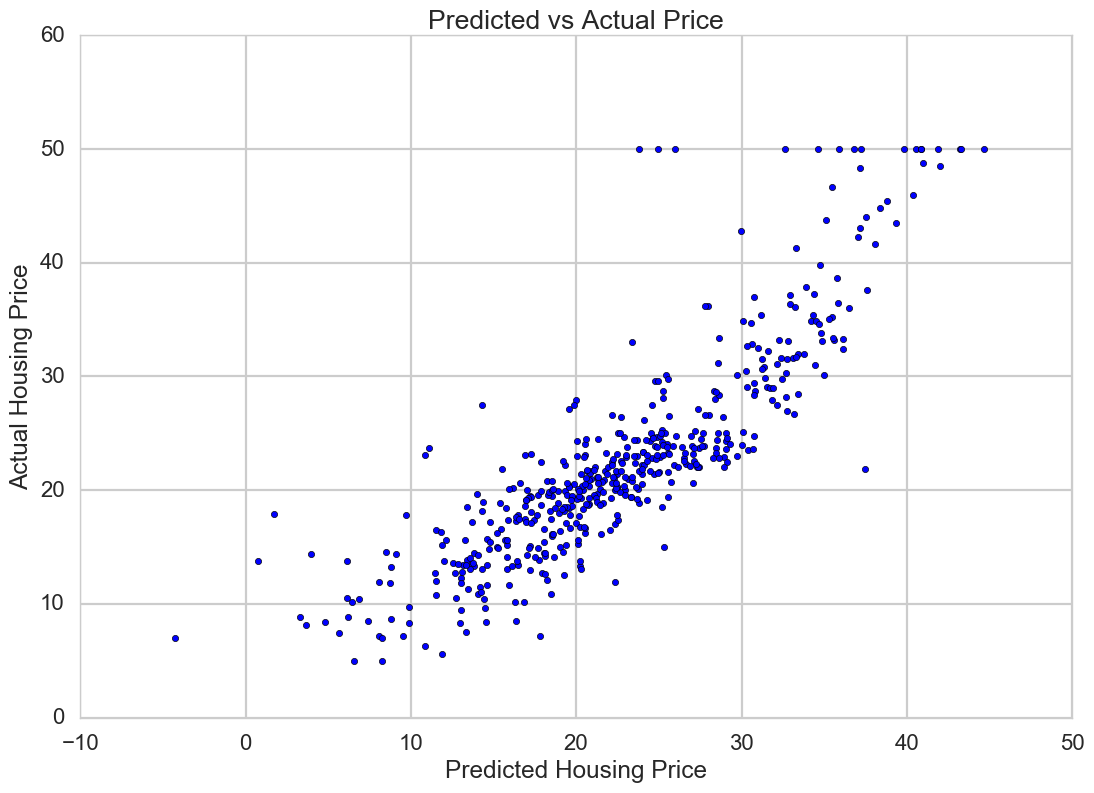

In [44]:
plt.scatter(lm.predict(X),bos.PRICE)
plt.title("Predicted vs Actual Price")
plt.xlabel("Predicted Housing Price")
plt.ylabel("Actual Housing Price")

**Exercise: We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?**

Overall, I have found scikit-learn to be a bit easier to use since it operates more like other Python classes, and allows for easy extraction and analysis of the coefficients and intercepts.  However, I also found statsmodels useful especially because of its summary method, which returns all relevant information about the regression - coefficients, intercepts, error, etc. - all in one easily read table.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [45]:
RSS=(np.sum((bos.PRICE - lm.predict(X)) ** 2))
print(RSS)

11080.27628414988


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [46]:
ESS=(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)
print(ESS)

1.30542671593e-22


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

# Part 3 Checkup Exercise Set IV

**Exercise: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.**

In [61]:
lmpt = LinearRegression()
PT = bos.PTRATIO.values.reshape(-1,1)
PRICE = bos.PRICE.values.reshape(-1,1)
lmpt.fit(PT, PRICE)
lmpt.score(PT,PRICE)
predict = (lmpt.predict(PRICE))
print(lmpt.coef_)
print(lmpt.intercept_)
print("Formula: Y = -2.157x + 62.345")

[[-2.1571753]]
[ 62.34462747]
Formula: Y = -2.157x + 62.345


**Exercise: Calculate (or extract) the $R^2$ value. What does it tell you?**

The R^2 value for this regression is about 0.258.  This is fairly low, which indicates that pupil to teacher ratio alone is probably not a very good predictor of housing prices overall.  

In [85]:
mpt = ols('PRICE ~ PTRATIO',bos).fit()
print(mpt.rsquared)

0.257847318009


**Exercise: Compute the $F$-statistic. What does it tell you?**
This model has an F-statistic of 175.1 with a P-value of 1.61e-34.  Therefore, the model is statistically significant.

In [87]:
mpt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 04 Jan 2017   Prob (F-statistic):           1.61e-34
Time:                        15:33:12   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000        56.393    68.296
PTRATIO       -2.1572      0.163    -13.233      0.000        -2.477    -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise: Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.**

The F-statistic and T-statistic both correlate with the same P-value of 1.61e-34.  It makes sense that this relationship should only apply to a simple linear regression model because we are only using one independent variable, therefore the t-value for the coefficient of PTRATIO should be the same as that of the full regression.

# Part 3 Checkup Exercise Set V

**Fit a linear regression model using three independent variables**


 *'CRIM' (per capita crime rate by town)*
 
 *'RM' (average number of rooms per dwelling)*
 
 *'PTRATIO' (pupil-teacher ratio by town)*


**Exercise: Compute or extract the $F$-statistic. What does it tell you about the model?**

The F-statistic for this model is 244.2 with a p-value of 1.09e-97.  This tells us that the model is statistically significant.

**Exercise: Compute or extract the $R^2$ statistic. What does it tell you about the model?**

The R^2 statistic for this model is 0.593.  This tells us that the model adequately accounts for variance in the population.  

**Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.**

All three variables are statistically significant predictors of housing price, however, the coefficient is much stronger for RM than the other two predictors, and for PTRATIO relative to CRIM.  This tells us that rooms per house is a strong predictor of housing price, which makes sense because in "real life" a larger house generally costs more if other variables are held constant.  Pupil-teacher ratio is also a decent predictor, with a coefficient of -1.07, which tells us that generally as pupil-teacher ratio increases, housing prices tend to decrease.  Crime rate, while statistically significant, has a relatively small coefficient compared to the other two variables.  This is somewhat surprising, however it can be partially explained by the fact, mentioned earlier in this assignment, that for most houses in this dataset the local crime rate is nearly 0.  

In [91]:
mcrp = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
mcrp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Wed, 04 Jan 2017   Prob (F-statistic):           1.09e-97
Time:                        15:44:44   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413       -11.240     4.627
CRIM          -0.2021      0.032     -6.301      0.000        -0.265    -0.139
RM             7.3816      0.402     18.360      0.000         6.592     8.171
PTRATIO       -1.0742      0.133     -8.081      0.000        -1.335    -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

# Part 4 Checkup Exercises

** Exercise: Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?**

Our F-test returned a P-value of 6.8e-7, which indicates that there is a statistically significant difference between the models with and without the NOX and AGE variables.  The model with more variables (mcrpnad) returned an AIC of 3208, while the model with fewer variables (mcrp) returned an AIC of 3233.  Since the mcrpnad model has a slightly lower AIC, and the difference is statistically significant, we can infer that mcrpnad is a better model.

In [99]:
mcrpnad = ols('PRICE ~ CRIM + RM + PTRATIO + NOX + AGE',bos).fit()
print(mcrpnad.compare_f_test(mcrp))
print(mcrpnad.summary())
print(mcrp.summary())

(14.611763139877191, 6.8032358929710601e-07, 2.0)
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     160.3
Date:                Wed, 04 Jan 2017   Prob (F-statistic):          1.92e-101
Time:                        16:02:48   Log-Likelihood:                -1598.2
No. Observations:                 506   AIC:                             3208.
Df Residuals:                     500   BIC:                             3234.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
In


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


# Part 5 Checkup Exercises

Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.
    
**Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?**

The fitted values vs residuals plot below generally shows a normal distribution of residuals.  However, there are some outliers and there is a specific pattern in some of the residuals - a straight line of data points between coordinates (10,39) and (47,3), which correspond with the ceiling effect mentioned earlier in this project.

In [102]:
# Your turn.
from statsmodels.graphics.regressionplots import *
mcrp = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()

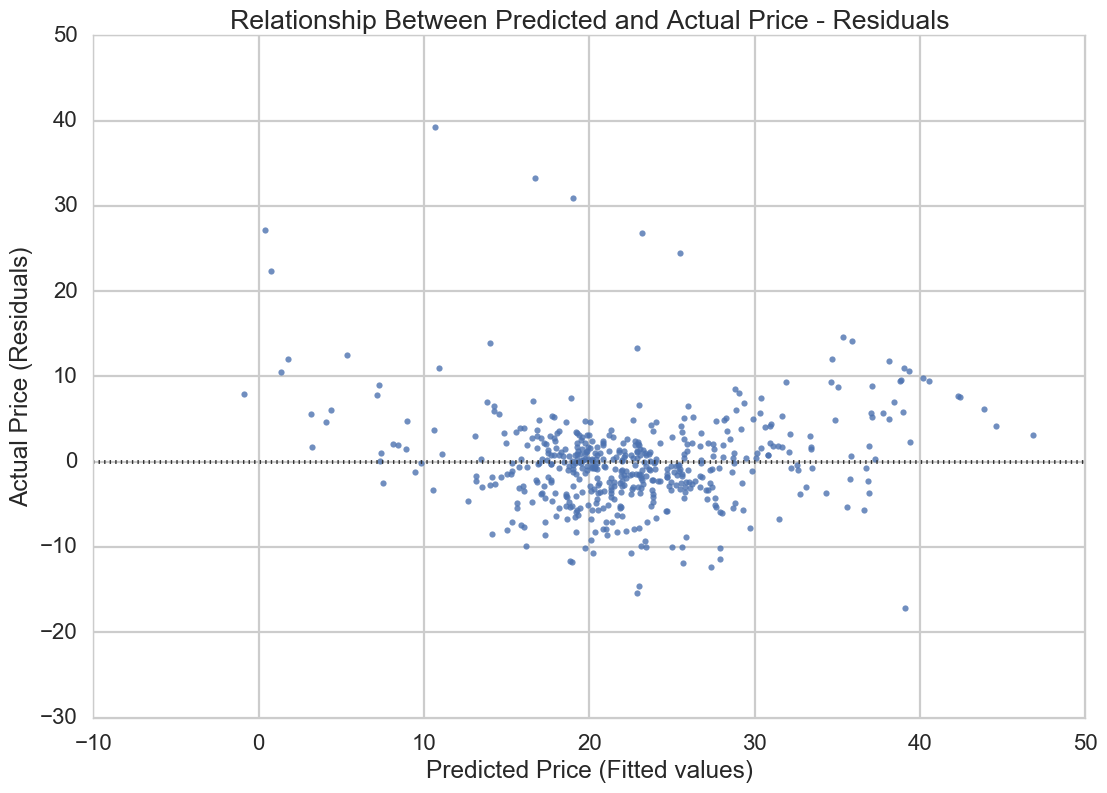

In [105]:
ax = sns.residplot(x=mcrp.predict(), y="PRICE", data=bos)
ax.set(xlabel='Predicted Price (Fitted values)', ylabel='Actual Price (Residuals)')
ax.set(title='Relationship Between Predicted and Actual Price - Residuals')

**Exercise: Construct a quantile plot of the residuals. What does the plot tell you?**

This quantile plot shows a slight "s" shape, with greater variability on the tails of the distribution.  This indicates that the distribution is slightly light-tailed (i.e., there is a normal distribution with a relatively small number of extremely high or low values.)

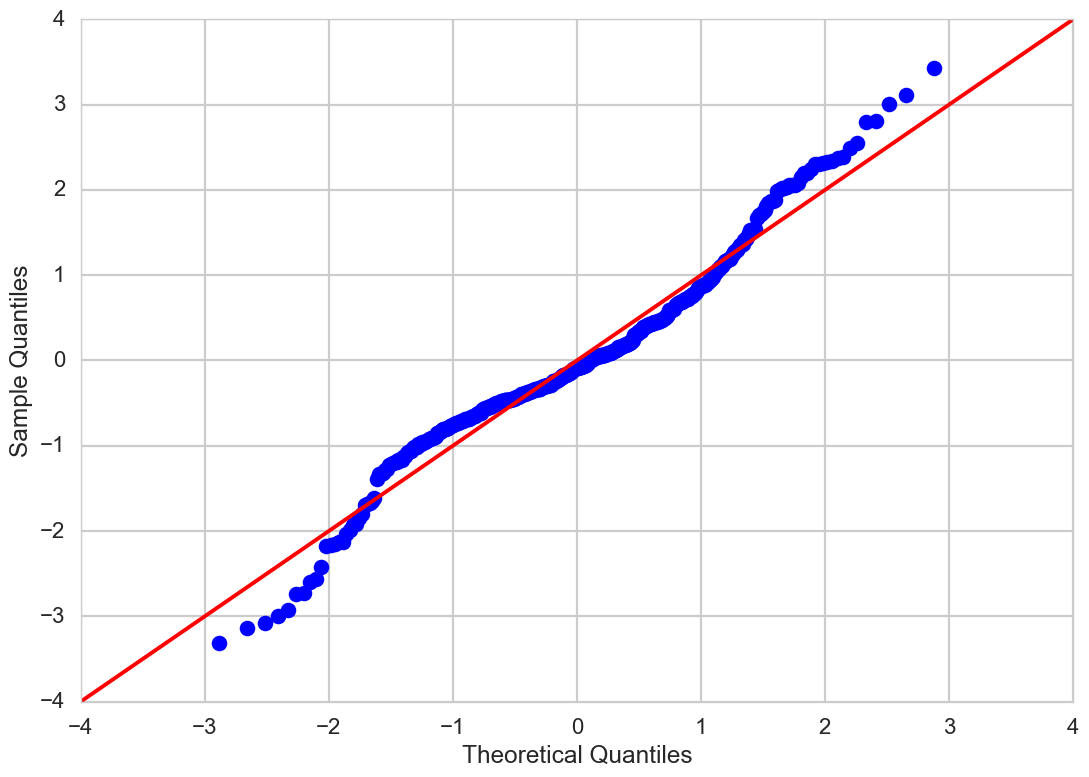

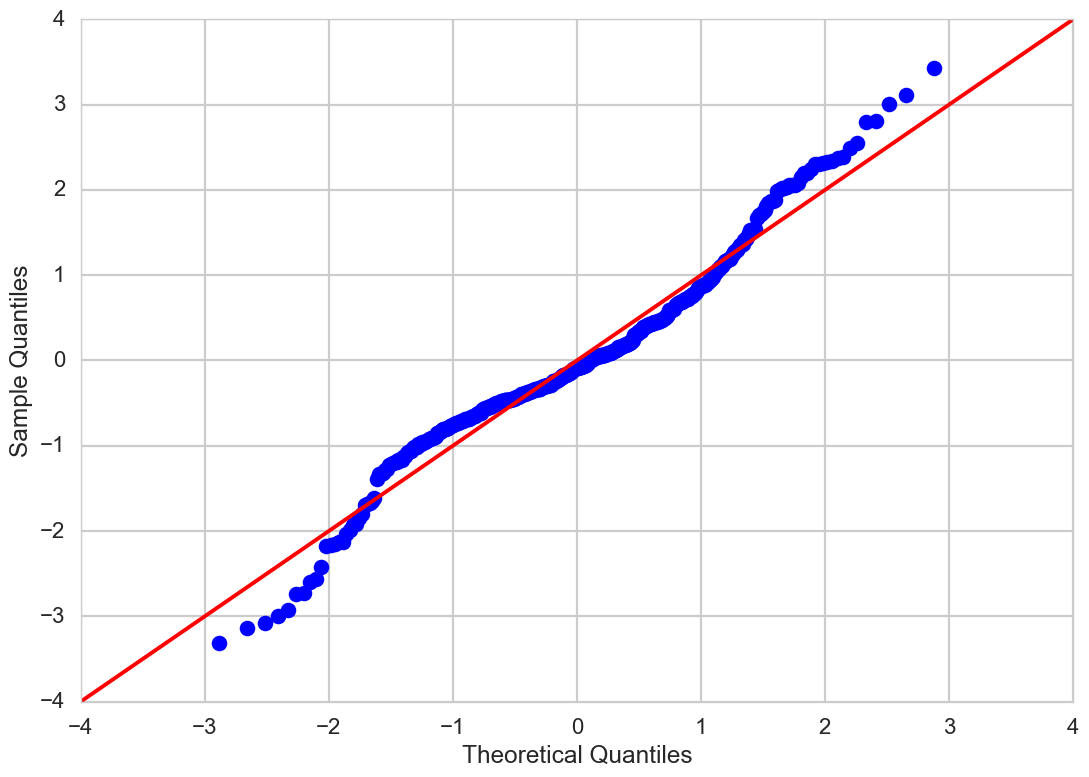

In [111]:
sm.qqplot(mcrp.predict(), fit=True, line='45')

**Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?**

The fitted vs. residual plot allows for a view of the residuals that is "closer" to the actual data.  It allows for viewing the real relationship between each prediction and the average regression line.  Alternatively, while the quantile plot is less interpretable for individual datapoints, it allows for clear interpretation of the distribution of residuals.  

**Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.**

There are several outliers in my model.  Specifically, there are some points where the actual house value was much higher than the predicted value, while there was one point where the actual value was actually quite a bit lower than the predicted value.  These outliers could be the result of other variables that were not included in the model, as well as variables that were not even included in our dataset.  For instance, a house could be worth much more than predicted because of a specific nuance of its location (e.g., historical significance, lived in by a celebrity, etc.) that is not generalizable in any way.  

**Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.**

Cases 380, 418, and 405 have particularly high leverage, while 368, 371, and 372 are also problematic since they are such outliers that even with low leverage they may be skewing the model.  The high leverage points could be the result of a particular case having an outlying value in one or more of the predictor variables, skewing the relative effect of that variable on the model.

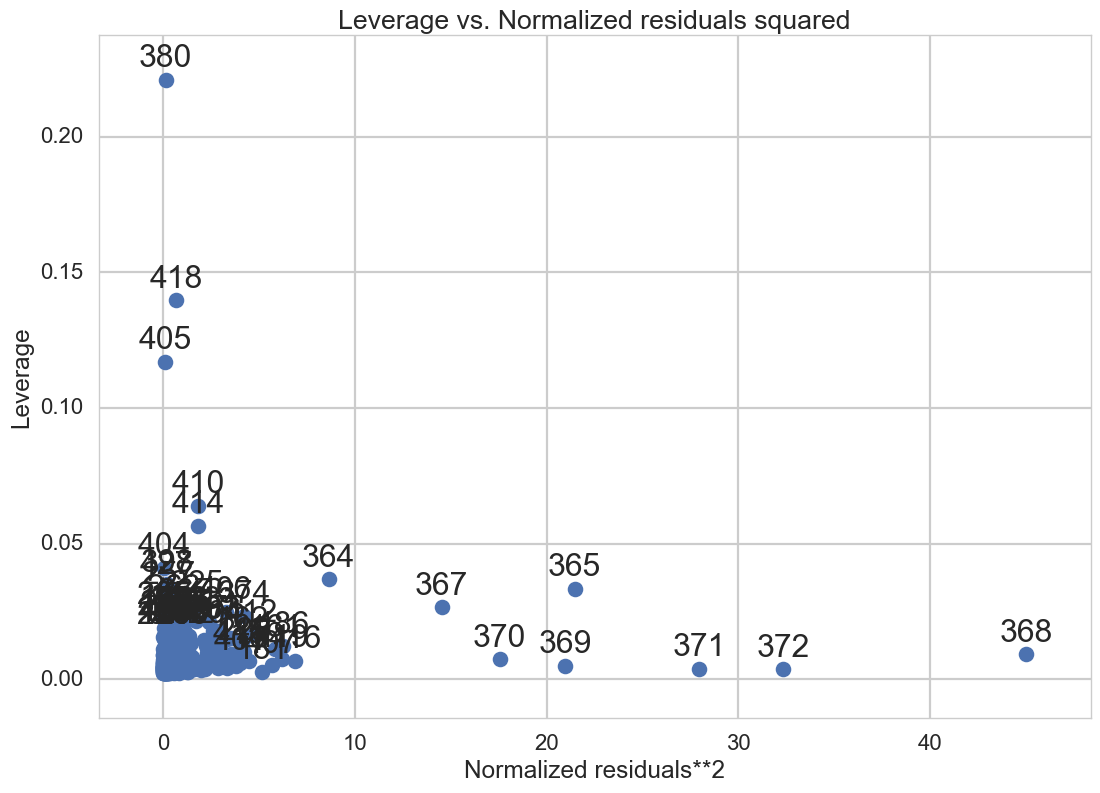

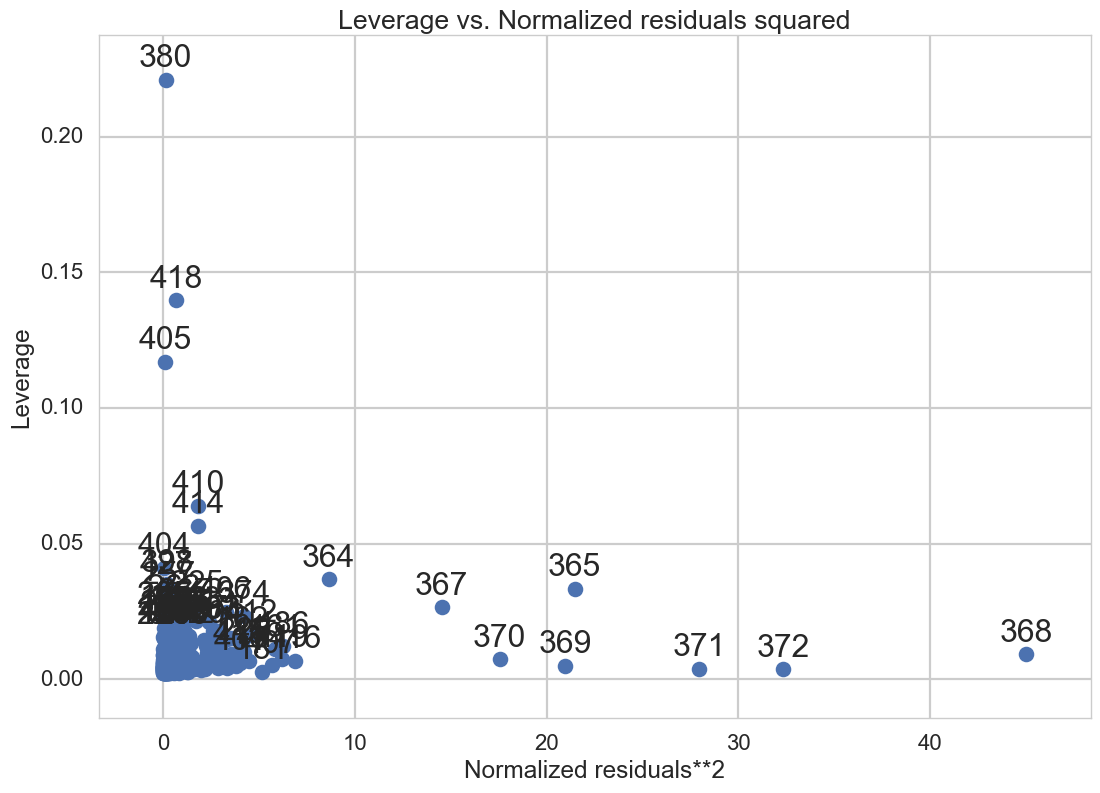

In [113]:
plot_leverage_resid2(mcrp)

**Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?**

Removing outliers and high leverage points had a significant effect on the quality of the model.  R-squared increased from 0.593 to 0.657, and AIC decreased from 3233 to 3080.  The coefficients for each variable also increase as well.

Original regression                             OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Wed, 04 Jan 2017   Prob (F-statistic):           1.09e-97
Time:                        18:08:09   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038

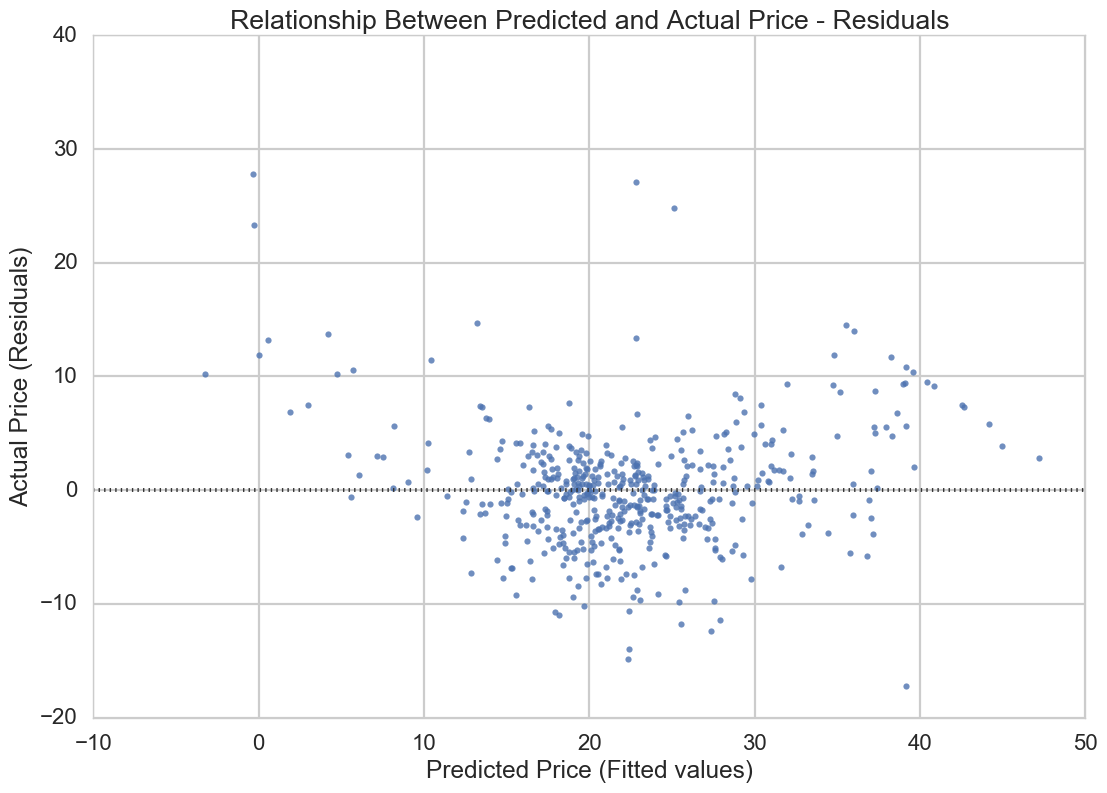

In [120]:
bos_cleaned = bos.drop(bos.index[[380,418,405,368,372,371]])
mcrp_cleaned = ols('PRICE ~ CRIM + RM + PTRATIO',bos_cleaned).fit()
print("Original regression",(mcrp.summary()))
print("Cleaned data regression",mcrp_cleaned.summary())
ax = sns.residplot(x=mcrp_cleaned.predict(), y="PRICE", data=bos_cleaned)
ax.set(xlabel='Predicted Price (Fitted values)', ylabel='Actual Price (Residuals)')
ax.set(title='Relationship Between Predicted and Actual Price - Residuals')